# BioPython

__Análisis de datos biológicos utilizando métodos de machine learning__

_MeIA_

`2023`

Biophyton es un conjunto de librerias para el análisis de datos Biológicos escrita en Python por un equipo internacional de desarrolladores. Se inicio en 1999 y su primer version fue lanzada en Julio del 2000. 

El objetivo de Biopython es hacer que los análisis Bioinformaticos sean lo más simple posibles. Proporciona varios formatos de archivo, incluidos, FASTA, GenBank, SwissProt, PDB, etc. También ofrece acceso a recursos en línea y bases de datos biológicas con interfaces para muchas herramientas para hacer más sencillas y rapidas las tareas de la bioinformática. 

http://biopython.org/DIST/docs/tutorial/Tutorial.pdf.

### Que podemos encontrar en Biopython

- La capacidad de analizar archivos bioinformáticos, incluida la compatibilidad con los siguientes formatos:
     - Blast output
     - Clusterw
     - Fasta
     - GenBank
     - PudMed and Medline
     - ExPASy files
     - SCOP
     - UniGene
     - SwissProt

Los archivos en los formatos admitidos se pueden iterar registro a registro o se pueden indexar y acceder a través de una interfaz de diccionario.

- Código para manejar destinos populares de bioinformática en línea como:
    - NCBI Blast, Blast, servicios de Entrez y PudMed
    - ExPASy, entrada de Swiss-Prot y Prosite
    
- Interfaces a programas comunes de bioinformática tales como:
    - Exploración independente de NCBI
    - Programa de alineamiento ClustalW
    - Herramientas de línea de comando EMBOSS
    
- Una clase secuencia estándar que se ocupa de secuencias, identificadores de secuencias y características de secuencias.

- Herramientas para realizar operaciones comunes en secuencias, como traducción, transcripción y cálculo de peso.

- Código pata realizar clasificación de datos utilizando K Nearest Neighbors, Naive Bayers o Suppert Vector Machines.

- Código para gestionar alineamientos, incluida una forma estándar de crear y gestionar matrices de sutitución.

- Código que facilita la división de tareas paralelizables en procesos separados.

- Programas basados en GUI para realizar manipulaciones de secuencias básicas, traducciones, BLASTing, etc.

- Integración con BioSQL.
    

### Instalación de Biopython

Podemos instalar Biopython usando conda o pip a través de Command prompt: 
    
`conda install biopython`

`pip install biopython`

Despues solo importamos la paqueteria dentro del notebook

In [1]:
import Bio

print(Bio.__version__)

1.81


### Seq Class


In [2]:
from Bio.Seq import Seq
my_seq = Seq("ATGGCCTTAAA")
print(type(my_seq))

<class 'Bio.Seq.Seq'>


Podemos utilizar metodo .count() como en los string.

In [3]:
my_seq.count("AA")

1

Podemos calcular el procentaje de GC 

In [4]:
100 * (my_seq.count("G") + my_seq.count("C")) / len(my_seq)

36.36363636363637

El contenido de GC influye en la evolución de las proteínas por su coste energético, y en este proceso intervienen tanto la síntesis de bases como de aminiácidos. Por lo tanto, las proteínas altamente ricas en GC pueden significar un menor costo para la síntesis de proteínas, pero también un mayor costo para la síntesis de nucleótidos. 

In [5]:
from Bio.SeqUtils import gc_fraction
gc_fraction(my_seq)

0.36363636363636365

#### Concatena y adiciona secuencias

In [6]:
seq1 = Seq("ACGT")
seq2 = Seq("AACCGG")
seq1 + seq2

Seq('ACGTAACCGG')

Biopython no revisa que las secuencias sean consistentes por lo que hay que tener cuidado con los tipos de datos

In [7]:
protein_seq = Seq("EVRNAK")
dna_seq = Seq("ACGT")
protein_seq + dna_seq

Seq('EVRNAKACGT')

Muchas veces nos enfrentamos a datos incosistente, principalmente tenemos datos en mayusculas y minusculas

In [8]:
dna_seq = Seq("acgtACGT")
print(dna_seq)
print(dna_seq.upper())
print(dna_seq.lower())

acgtACGT
ACGTACGT
acgtacgt


## El dogma central 

Vamos a recordar un poco el dogma central

<img src="centraldogma.jpeg" width="700" height="400"/>

Para las secuencias podemos obtener facilmente complemento o el complemento inverso de un objeto Seq utilizando sus métodos integrados.

In [9]:
my_seq = Seq("GATCGATGGGCCTATATAGGATCGAAAATCGC")
my_seq

Seq('GATCGATGGGCCTATATAGGATCGAAAATCGC')

In [10]:
my_seq.complement()

Seq('CTAGCTACCCGGATATATCCTAGCTTTTAGCG')

In [11]:
my_seq.reverse_complement()

Seq('GCGATTTTCGATCCTATATAGGCCCATCGATC')

<div class="alert alert-block alert-danger">
<b>Alerta:</b> Debemos recordar que la secuencia de proteínas no tiene secuencia complementaria
</div>

### Transcripción
<img src="transcription.png" width="700" height="400"/>

In [12]:
coding_dna = Seq("ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG")

In [13]:
print(coding_dna)

ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG


In [14]:
template_dna = coding_dna.reverse_complement()
template_dna

Seq('CTATCGGGCACCCTTTCAGCGGCCCATTACAATGGCCAT')

Esto coincide con la imagen anterior, debemos recordar que por convención, las secuencias de nucleótidos se leen en dirección 5' a 3', mientras que en la imagen la hebra molde se muestra al revés.

Bien, ahora vamos a transcribir la hebra de codificación en el ARNm correspondiente.

In [15]:
messenger_rna = coding_dna.transcribe()
messenger_rna

Seq('AUGGCCAUUGUAAUGGGCCGCUGAAAGGGUGCCCGAUAG')

Como podemos observar solo cambiamos la timina por uracilo.

Si deseamos realizar una verdadera transcripción biológica comenzando con la hebra de plantilla, realizaremos estos dos paso:

In [16]:
template_dna.reverse_complement().transcribe()

Seq('AUGGCCAUUGUAAUGGGCCGCUGAAAGGGUGCCCGAUAG')

In [17]:
messenger_rna = Seq("AUGGCCAUUGUAAUGGGCCGCUGAAAGGGUGCCCGAUAG")
print(messenger_rna)
messenger_rna.back_transcribe()

AUGGCCAUUGUAAUGGGCCGCUGAAAGGGUGCCCGAUAG


Seq('ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG')

Esta es la secuencia del ARN mensajero.

## Traducción

Ahora realizaremos la transcripción de nuestro mRNA para obtener la secuencia de proteínas

In [18]:
messenger_rna = Seq("AUGGCCAUUGUAAUGGGCCGCUGAAAGGGUGCCCGAUAG")
messenger_rna.translate()

Seq('MAIVMGR*KGAR*')

Tambien podemos hacer la transcripción desde la secuencia de ADN.

In [19]:
coding_dna.translate()

Seq('MAIVMGR*KGAR*')

Podemos observar que nuestra secuencia tiene mas de un codon de paro $(*)$ esto se da por el tipo de tabla de transcripción que se utiliza para esto. Por ejemplo vamos a utilizar la tabla "Vertebrate mitochondrial", tambien puede ser definida por table=2.

In [20]:
coding_dna.translate(table="Vertebrate Mitochondrial")

Seq('MAIVMGRWKGAR*')

Podemos eliminar el codon de paro para facilitar la interacción con otros programas

In [21]:
coding_dna.translate(table=2, to_stop=True)

Seq('MAIVMGRWKGAR')

Ahora vamos a tomar un CDS (complete coding sequence), es decir una secuencia de nucleótidos (ARNm despues del splicing) que es un número entero de codonos (es decir, su longitud es un multiplo de 3), inicia con un codón de inicio, termina con un codón de paro y no tiene codones de paro internos en el marco de lectura.

Debemos tener cuidado cuando nuestro organismo no usa un codon de inicio estandar, esto suele suceden en bacterias.

In [22]:
gene = Seq("GTGAAAAAGATGCAATCTATCGTACTCGCACTTTCCCTGGTTCTGGTCGCTCCCATGGCA"
           "GCACAGGCTGCGGAAATTACGTTAGTCCCGTCAGTAAAATTACAGATAGGCGATCGTGAT"
           "AATCGTGGCTATTACTGGGATGGAGGTCACTGGCGCGACCACGGCTGGTGGAAACAACAT"
           "TATGAATGGCGAGGCAATCGCTGGCACCTACACGGACCGCCGCCACCGCCGCGCCACCAT"
           "AAGAAAGCTCCTCATGATCATCACGGCGGTCATGGTCCAGGCAAACATCACCGCTAA")


In [23]:
gene.translate(table="Bacterial")

Seq('VKKMQSIVLALSLVLVAPMAAQAAEITLVPSVKLQIGDRDNRGYYWDGGHWRDH...HR*')

In [24]:
gene.translate(table="Bacterial", to_stop=True)

Seq('VKKMQSIVLALSLVLVAPMAAQAAEITLVPSVKLQIGDRDNRGYYWDGGHWRDH...HHR')

En el codigo genético bacteriano GTC es codon de inicio válido y aunque normalmente codifica Valina, si se usa como un codon de inicio debe traducirse como metionina.

In [25]:
gene.translate(table="Bacterial", cds=True)

Seq('MKKMQSIVLALSLVLVAPMAAQAAEITLVPSVKLQIGDRDNRGYYWDGGHWRDH...HHR')

### Tabla de transcripciones

In [26]:
from Bio.Data import CodonTable

In [27]:
standard_table = CodonTable.unambiguous_dna_by_name["Standard"]

In [28]:
mito_table = CodonTable.unambiguous_dna_by_id[2]

In [29]:
print(standard_table)

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [30]:
print(mito_table)

Table 2 Vertebrate Mitochondrial, SGC1

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L   | TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA Stop| A
A | ATG M(s)| ACG T   | AAG K   | AGG Stop| G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G   

In [31]:
mito_table.stop_codons

['TAA', 'TAG', 'AGA', 'AGG']

In [32]:
standard_table.stop_codons

['TAA', 'TAG', 'TGA']

In [33]:
mito_table.start_codons

['ATT', 'ATC', 'ATA', 'ATG', 'GTG']

In [34]:
standard_table.start_codons

['TTG', 'CTG', 'ATG']

### Análisis de archivos de secuencia

Los objetos Bio.Seq se utilizan para la representación de secuencias biológicas. Sin embargo, a menudo necesitamos almacenar cierta información junto con la secuencia, como la identificación, la descripción y la taxonomía.

Para hacer esto, el paquete Biopython tiene una clase SeqRecord. que tiene características más sofisticadas como almacenar varios identificadores y anotaciones asociadas con la secuencia o la clase seq.

In [35]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

protein_record = SeqRecord(Seq("MRAKWRKKRMRRLKRKRRKMRQRSK"),
id="P62945", name="RL41_HUMAN",
description="60S ribosomal protein L41")


print(protein_record)

ID: P62945
Name: RL41_HUMAN
Description: 60S ribosomal protein L41
Number of features: 0
Seq('MRAKWRKKRMRRLKRKRRKMRQRSK')


Podemos crear un objeto SeqRecord dando varios argumentos, sin embargo esta diseñado para adquirir toda la información sobre la secuencia biológica de archivos almacenados o extraídos en FASTA, Genbank, SwissProty otros.

Normalmente las secuencias Biologicas de ADN, ARN y Proteínas se almacenan en formato fasta, fa, fna o faa.

El cual se caracteriza por iniciar cada gen o proteína con un simbolo `>` mayor que, el cual enmarca la línea de descripción, posteriormente se encuentran un conjunto de lineas, normalmente de 80 caracteres, que son la secuencia del gen o proteínas, la información del gen o proteína termina cuando inicia otro mayor que o cuando no se encuentran más secuencias.

`>gi|5524211|gb|AAD44166.1| cytochrome b [Elephas maximus maximus]
LCLYTHIGRNIYYGSYLYSETWNTGIMLLLITMATAFMGYVLPWGQMSFWGATVITNLFSAIPYIGTNLV
EWIWGGFSVDKATLNRFFAFHFILPFTMVALAGVHLTFLHETGSNNPLGLTSDSDKIPFHPYYTIKDFLG
LLILILLLLLLALLSPDMLGDPDNHMPADPLNTPLHIKPEWYFLFAYAILRSVPNKLGGVLALFLSIVIL
GLMPFLHTSKHRSMMLRPLSQALFWTLTMDLLTLTWIGSQPVEYPYTIIGQMASILYFSIILAFLPIAGX
IENY`

En Biopython tenemos un módulo SeqIO que permite leer y escribir archivos de secuencias de varios formatos y hacer que el manejo de estos datos sea más sencillo.

In [36]:
from Bio.SeqRecord import SeqRecord
sequence = ''
with open('sample.fasta','r') as f:
    lines = f.readlines() # read the lines of the file
for line in lines:
    if line.startswith('>'):
        description = line.rstrip() # to get rid of the newline character
    else:
        sequence = sequence + line.rstrip()

protein_record = SeqRecord(Seq(sequence),
id=description , name=description, description=description)

print(protein_record)

ID: >sp|Q9SE35|20-107
Name: >sp|Q9SE35|20-107
Description: >sp|Q9SE35|20-107
Number of features: 0
Seq('QSIADLAAANLSTEDSKSAQLISADSSDDASDSSVESVDAASSDVSGSSVESVD...RIL')


Leemos las líneas del archivo. A continuación, iteramos sobre cada una de las líneas e insertamos una línea, que comienza con el símbolo ">" en la variable de descripción. Las líneas subsiguientes se agregan con una variable de cadena vacía nombrada como una secuencia. El método “rstrip()” se utiliza para deshacerse del carácter de nueva línea “\n”, que normalmente aparece al final de las líneas.
Este código parece fácil, aunque tuvimos que escribir algunas sentencias. El mismo problema se volverá un poco más complicado una vez que trabajemos con varias secuencias en un solo archivo FASTA. El problema se complicará aún más cuando intentemos analizar un archivo de formato GenBank.

In [37]:
from Bio import SeqIO
records = SeqIO.parse("sample.fasta", "fasta")
for record in records:
    print(record)

ID: sp|Q9SE35|20-107
Name: sp|Q9SE35|20-107
Description: sp|Q9SE35|20-107
Number of features: 0
Seq('QSIADLAAANLSTEDSKSAQLISADSSDDASDSSVESVDAASSDVSGSSVESVD...RIL')


El método "parse" en el modelo "SeqIO" toma el nombre del archivo o la ruta y el formato del archivo como argumentos y devuelve un iterador de SeqRecods. Se puede acceder a los elementos de este iterador mediante un bucle "for". En el ejemplo anterior, solo tenemos una secuencia, pero podemos usar el mismo método para un archivo FASTA con múltiples secuencias.

In [38]:
record_list = []
for record in SeqIO.parse("sequences.fasta", "fasta"):
    print(record.id)
    record_list.append(record)

sp|Q3ZM63|ETDA_HUMAN
sp|P53803|RPAB4_HUMAN
sp|Q538Z0|LUZP6_HUMAN
sp|Q9BZ97|TTY13_HUMAN
sp|P58511|SI11A_HUMAN


Podemos crear una lista de SeqRecords agregando los elementos del iterador de SeqIO.parse a una lista vacía. También podemos adquirir una lista de SeqRecods ingresando este iterador como un argumento para la función "list()". SeqIO puede manejar varios formatos de archivos de secuencias biológicas como FASTA, GenBank, EMBL y SwissProt, y también puede leer los archivos de salida de varias plataformas NGS como los archivos FASTQ de Solexa e Illumina.

El GenBank es la base de datos de secuencias genéticas del NIH (National Institutes of Health of USA), https://www.ncbi.nlm.nih.gov/genbank/

<img src="genbank.png" width="700" height="400"/>

<img src="genbankexample.png" width="700" height="400"/>

In [39]:
records = SeqIO.parse("sequence.gb","genbank")
for record in records:
    print(record)

ID: X03109.1
Name: X03109
Description: Chimpanzee fetal G-gamma-globin gene
Number of features: 13
/molecule_type=DNA
/topology=linear
/data_file_division=PRI
/date=14-NOV-2006
/accessions=['X03109']
/sequence_version=1
/keywords=['direct repeat', 'G-gamma-globin', 'gamma-globin', 'tandem repeat']
/source=Pan troglodytes (chimpanzee)
/organism=Pan troglodytes
/taxonomy=['Eukaryota', 'Metazoa', 'Chordata', 'Craniata', 'Vertebrata', 'Euteleostomi', 'Mammalia', 'Eutheria', 'Euarchontoglires', 'Primates', 'Haplorrhini', 'Catarrhini', 'Hominidae', 'Pan']
/references=[Reference(title='Chimpanzee fetal G gamma and A gamma globin gene nucleotide sequences provide further evidence of gene conversions in hominine evolution', ...), Reference(title='Direct Submission', ...)]
Seq('CCGGCGGCTGGCTAGGGATGAAGAATAAAAGGAAGCACCCTCCAGCAGTTCCAC...AAT')


## Alineamiento de secuencias

Una de las tareas más importantes en Bioinformática es la comparación de secuencias a nivel de ADN o proteínas. Esto nos permite identificar regiones conservadas entre de ellas y determinar su relación u homología.

La identificación de secuencias similares entre e inter especies, ha permitido identificar genes o proteínas con funciones biológicas similares, se han identificado tres tipos proteínas homologas:

- Homologos: la homología de secuencias se refiere a la situación en la que las secuencias de dos o más proteínas o ácidos nucleicos son similares entre sí debido a que presentan un mismo origen evolutivo.

    - Ortologos: Las secuencias o genes ortólogos son aquellas secuencias homólogas que se han separado por un evento de especiación. Es decir, cuando una especie diverge en dos especies separadas, se dice que las copias divergentes de un mismo gen en las especies resultantes son ortólogas.

    - Paralogos: Las secuencias homólogas se dicen parálogas si las mismas se hallan separadas por un evento de duplicación. En otras palabras, si un gen de un organismo se duplica para ocupar dos posiciones diferentes en el mismo genoma, entonces las dos copias son parálogas.

    - Xenólogo: Secuencias homólogas de dos especies diferentes pero provienen de una transferencia horizontal.

<img src="homologos.png" width="600" height="350"/>


### Alineación de dos secuencias

Vamos a iniciar la comparación a nivel de dos secuencias:

<img src="align1.gif" width="600" height="350"/>

Hay dos tipos de alineaciones:
    
   - El método de alineación global tiene en cuenta la longitud total de las dos secuencias e intenta emparejarlas para obtener la mejor alineación en toda la secuencia. Esto se obtiene insertando huecos o gaps en ambas secuencias. Needleman-Wunsch es uno de los más utilizados.
    
   - El método de alineación local, en contraste con la alineación global, proporciona las seubsecuencias más similaress entre las dos seuencias. El algoritmo Smith-Warerman es una de las implementaciones del algoritmo de alineación local que aplica programación dinámica. 
    
<img src="Global-vs-Local-Alignment_W640.jpeg" width="600" height="350"/>


Exiten varios caminos para alinear dos secuencias, como:

- El método de matriz de puntos, que es un proceso en el que se pueden alinear dos secuencias usando una matriz bidimensional, y los datos se trazan en puntos de identidad entre el eje x y el eje y. Por lo tanto, podemos visualizar las parcelas e inferir los resultados. Dado que podría haber varias coincidencias aleatorias en el caso de secuencias genómicas completas, el método de alineación de matriz de puntos solo es adecuado para secuencias muy similares y cortas.

- Otro método de alineación de secuencias por pares es el enfoque de programación dinámica. La base del enfoque de programación dinámica para la alineación de secuencias es el método de puntuación, donde la puntuación indica la medida de similitud entre dos secuencias. Este algoritmo de alineación genera una matriz de números que representa todas las posibles alineaciones entre las secuencias. A continuación, la puntuación se utiliza como medida de comparación entre dos secuencias. Se tienen en cuenta tres factores básicos al determinar si los puntajes son coincidentes, desiguales o si hay una penalización por brecha. 

El enfoque de programación dinámica de la alineación es el método más precido para la alineación de secuencias. Sin embargo, su inconveniente es que es extremadamente lento y computacionalmente intensivo para secuencias grandes. 


    
Utilizaremos el modulos Bio.Aling y la clase PairwiseAligner.

In [40]:
from Bio import Align
aligner = Align.PairwiseAligner()
seq1 = 'TACGCCCGC'
seq2 = 'TAGCCCATGC'
results = aligner.align(seq1, seq2)
for result in results:
    print(result)
score = aligner.score(seq1, seq2)
print(score)

target            0 TACGCCC--GC  9
                  0 ||-||||--|| 11
query             0 TA-GCCCATGC 10

8.0


PairwiseAligner() tiene varios parametros predeterminados, como el match, mismatch y las penalizaciones de gaps, también podemos cambiar el mode entre globaly local. Aquí podemos ver los parametros.

In [41]:
aligner = Align.PairwiseAligner()
print(aligner)
print('----------------')
print(aligner.algorithm)

Pairwise sequence aligner with parameters
  wildcard: None
  match_score: 1.000000
  mismatch_score: 0.000000
  target_internal_open_gap_score: 0.000000
  target_internal_extend_gap_score: 0.000000
  target_left_open_gap_score: 0.000000
  target_left_extend_gap_score: 0.000000
  target_right_open_gap_score: 0.000000
  target_right_extend_gap_score: 0.000000
  query_internal_open_gap_score: 0.000000
  query_internal_extend_gap_score: 0.000000
  query_left_open_gap_score: 0.000000
  query_left_extend_gap_score: 0.000000
  query_right_open_gap_score: 0.000000
  query_right_extend_gap_score: 0.000000
  mode: global

----------------
Needleman-Wunsch


Podemos personalizar los valores de match, mismatch, y penalización de gaps.

In [42]:
aligner = Align.PairwiseAligner()
seq1 = 'TACGCCCGC'
seq2 = 'TAGCCCATGC'
aligner.match_score = 1.0
aligner.mismatch_score = -2.0
aligner.gap_score = -2.5
alignments = aligner.align(seq1, seq2)
for alignment in alignments:
    print(alignment)
score = aligner.score(seq1, seq2)
print(score)

target            0 TACGCCC--GC  9
                  0 ||-||||--|| 11
query             0 TA-GCCCATGC 10

0.5


En el ejemplo anterior, hemos cambiado la puntuación de match, mismatch y el score del gab, reultado en un cambio en la puntuación general. El aumento del mismatch y gap hará que la alineación sea más estricta.

In [43]:
#Podemos cambiar el parametro de alineación global a local con mode.
aligner = Align.PairwiseAligner()
aligner.mode = 'local'
seq1 = 'TACGCCCGC'
seq2 = 'TAGCCCATGC'
alignments = aligner.align(seq1, seq2)
for alignment in alignments:
    print(alignment)
score = aligner.score(seq1, seq2)
print(score)

target            0 TACGCCC--GC  9
                  0 ||-||||--|| 11
query             0 TA-GCCCATGC 10

8.0


Pongamos algo de rigor en los diversos parámetros de puntuación para estudiar la diferencia en la alineación y la puntuación.

In [44]:
aligner = Align.PairwiseAligner()
aligner.mode = 'local'
seq1 = 'TACGCCCGC'
seq2 = 'TAGCCCATGC'
aligner.match_score = 1.0
aligner.mismatch_score = -2.0
aligner.gap_score = -2.5
alignments = aligner.align(seq1, seq2)
for alignment in alignments:
    print(alignment)
score = aligner.score(seq1, seq2)
print(score)

target            3 GCCC 7
                  0 |||| 4
query             2 GCCC 6

4.0


Un aspecto importante cuando realizamos alineamientos son las matrices de sustitución, las cuales son matrices de similitud entre dos aminoacidos o nucleotidos.

Que importancia tienen estas matrices? El tipo de sustitución se puede ver menos afectada de acuerdo al tipo de aminoácido que se tenga, por ejemplo si un aminoacido hidrofóbico reemplaza a otro aminoacido hidrofóbico, entonces el cambio puede ser tolerable y tales sustituciones se conocen como sustituciones conservadoras. Por el contrario un cambio de un aminoácido hidrofóbico por un hidrofílico se considera radical.

Biopython tiene al rededor de 25 matrices de sustitución y estas se pueden obtener por medio de Bio.Align import substitution_matrices

Una de las más comunes es BLOSUM62

In [45]:
from Bio.Align import substitution_matrices
matrix = substitution_matrices.load("BLOSUM62")
print(matrix)

#  Matrix made by matblas from blosum62.iij
#  * column uses minimum score
#  BLOSUM Clustered Scoring Matrix in 1/2 Bit Units
#  Blocks Database = /data/blocks_5.0/blocks.dat
#  Cluster Percentage: >= 62
#  Entropy =   0.6979, Expected =  -0.5209
     A    R    N    D    C    Q    E    G    H    I    L    K    M    F    P    S    T    W    Y    V    B    Z    X    *
A  4.0 -1.0 -2.0 -2.0  0.0 -1.0 -1.0  0.0 -2.0 -1.0 -1.0 -1.0 -1.0 -2.0 -1.0  1.0  0.0 -3.0 -2.0  0.0 -2.0 -1.0  0.0 -4.0
R -1.0  5.0  0.0 -2.0 -3.0  1.0  0.0 -2.0  0.0 -3.0 -2.0  2.0 -1.0 -3.0 -2.0 -1.0 -1.0 -3.0 -2.0 -3.0 -1.0  0.0 -1.0 -4.0
N -2.0  0.0  6.0  1.0 -3.0  0.0  0.0  0.0  1.0 -3.0 -3.0  0.0 -2.0 -3.0 -2.0  1.0  0.0 -4.0 -2.0 -3.0  3.0  0.0 -1.0 -4.0
D -2.0 -2.0  1.0  6.0 -3.0  0.0  2.0 -1.0 -1.0 -3.0 -4.0 -1.0 -3.0 -3.0 -1.0  0.0 -1.0 -4.0 -3.0 -3.0  4.0  1.0 -1.0 -4.0
C  0.0 -3.0 -3.0 -3.0  9.0 -3.0 -4.0 -3.0 -3.0 -1.0 -1.0 -3.0 -1.0 -2.0 -3.0 -1.0 -1.0 -2.0 -2.0 -1.0 -3.0 -3.0 -2.0 -4.0
Q -1.0  1.0  0.0  0.

In [46]:
aligner = Align.PairwiseAligner()
matrix = Align.substitution_matrices.load("BLOSUM62")
aligner.substitution_matrix = matrix
aligner.match_score = 1.0
aligner.mismatch_score = -2.0
aligner.gap_score = -2.5
protein_1 = 'MERSTQELFINFTVVLITVLLMWLLVRSYQY'
protein_2 = 'MGINTRELFLNFTIVLITVILMWLLVRSYQY'
score = aligner.score(protein_1 , protein_2)
alignments = aligner.align(protein_1 , protein_2)
print(score)
for alignment in alignments:
    print(alignment)

10.0
target            0 MERSTQELFINFTVVLITVLLMWLLVRSYQY 31
                  0 |...|.|||.|||.|||||.||||||||||| 31
query             0 MGINTRELFLNFTIVLITVILMWLLVRSYQY 31



“|” representa coincidencias y “.” representa aminoácidos similares. También podemos realizar la alineación local ajustando los parámetros del objeto “aligner”

## BLAST

The Basic Local Alignment Search Tool (BLAST) es una de las herramientas más utilizadas en la investigación Biológica.

Nos permite asignarle una función putativa a los genes de interés. Por lo que la manera más facil es encontrar los genes con mayor similitud a nivel de secuencia con nuestro gen estudiado, para asignarle una función previamente conocida.

BLAST fue desarrollado por David J. Lipman y sus colegas en 1990. El algoritmo consiste en dividir la secuencia de consulta en pequeñas subsecuencias denominadas K-mers donde k representa el numero de mers o la longitud de la subsecuencia, el valor k suele estar entre 3 y 10 para una secuencia de proteínas

Estos pequeños k-mers luego se alinean con las secuencias en la base de datos y los hits son generados. Los hits se refinan aún más al alargar estas subsecuencias de acuerdo a la similitud entre la secuencia de consulta y la secuencia correspondiente en la base de datos.

Existen servicios en linea para realizar el BLAST

https://blast.ncbi.nlm.nih.gov/Blast.cgi

Se puede instalar el software de BLAST y la base de datos de secuencias de NCBI en la computadora pero ocupa mucha memoria

Una alternativa es utilizar el modulo NCBIWWWW

In [55]:
from Bio.Blast import NCBIWWW
sequence = Seq("ATTTTCTTGCTCTTGAGCTCTGGCACTTCTCTGCTGCTGTC")
result_handle = NCBIWWW.qblast("blastn", "nt", sequence)

qblast, tiene tres principales parámetros:
- Primero el tipo de programa que utilizaremos esto depende de nuestra secuencia y de la base de datos a utilizar.
    - blastn: Nucleotide-Nucleotide
    - blastp: Protein-Protein
    - tblastn: Protein-Nucleotide
    - blastx: Nucleotide-Protein
- El segundo es la pase de datos a utilizar
- El tercero es la secuencia o numero id de la secuencia
    

In [50]:
from Bio.Blast import NCBIXML
blast_records = NCBIXML.parse(result_handle)
for b in blast_records:
    for alignment in b.alignments[:2]:
        for hsp in alignment.hsps:
            print('****Alignment****')
            print('sequence:', alignment.title)
            print('length:', alignment.length)
            print('e value:', hsp.expect)
            print(hsp.query[0:75] + '…')
            print(hsp.match[0:75] + '…')
            print(hsp.sbjct[0:75] + '…')

ValueError: Your XML file was empty

In [56]:
import pandas as pd
sequence = Seq("ATTTTCTTGCTCTTGAGCTCTGGCACTTCTCTGCTGCTGTC")
result_handle = NCBIWWW.qblast("blastn", "nt", sequence)
blast_records = NCBIXML.parse(result_handle)
blast_data = []  #la unica cosa que hice es crear una lista vazia para guardar con append
for record in blast_records:
    for alignment in record.alignments:
        for hsp in alignment.hsps:
            blast_data.append({
                'Query ID': record.query_id,
                'Alignment Title': alignment.title,
                'Alignment Length': alignment.length,
                'E-value': hsp.expect,
                'Score': hsp.score,
                'Query Sequence': hsp.query,
                'Alignment Sequence': hsp.sbjct
            })

df = pd.DataFrame(blast_data)
df

,Query ID,Alignment Title,Alignment Length,E-value,Score,Query Sequence,Alignment Sequence
0,Query_59857,gi|31790676|dbj|AP002353.4| Homo sapiens genom...,202607,1.877320e-10,82.0,ATTTTCTTGCTCTTGAGCTCTGGCACTTCTCTGCTGCTGTC,ATTTTCTTGCTCTTGAGCTCTGGCACTTCTCTGCTGCTGTC
1,Query_59857,gi|2464075051|ref|XR_008511356.1| PREDICTED: P...,520,7.982560e-09,77.0,ATTTTCTTGCTCTTGAGCTCTGGCACTTCTCTGCTGCTGTC,ATTTTCTTGCTCTTGAGCTCTGGCTCTTCTCTGCTGCTGTC
2,Query_59857,gi|1777262699|ref|XR_637767.2| PREDICTED: Papi...,904,4.135070e-06,67.0,CTTGCTCTTGAGCTCTGGCACTTCTCTGCTGCTGTC,CTTGCTCTTGAGCTCTGGCTCTTCTCTGCTGCTGTC
3,Query_59857,gi|795278787|ref|XM_012066512.1| PREDICTED: Ce...,705,1.443280e-05,64.0,ATTTTCTTGCTCTTGAGCTCTGGCACTTCTCTGCTGCTGTC,ATTTTCTTGCTCTTGAGCTCTGGCCCT--TCTGCTGCTGTC
4,Query_59857,gi|2441772989|ref|XM_053593833.1| PREDICTED: N...,1386,5.037550e-05,62.0,ATTTTCTTGCTCTTGAGCTCTGGCACTTCTCTGCTGCTGTC,ATATTCTTGCTCTTGAGTTCTGGCTTTTCTCTGCTGCTGTC
5,Query_59857,gi|2441772987|ref|XM_053593832.1| PREDICTED: N...,1254,5.037550e-05,62.0,ATTTTCTTGCTCTTGAGCTCTGGCACTTCTCTGCTGCTGTC,ATATTCTTGCTCTTGAGTTCTGGCTTTTCTCTGCTGCTGTC
6,Query_59857,gi|1149873612|ref|XM_020286887.1| PREDICTED: M...,767,1.758280e-04,60.0,TTTTCTTGCTCTTGAGCTCTGGCACTTCTCTGCTGCTGTC,TTTTCTTGCTCTTGAACTCTGGCTTGTCTCTGCTGCTGTC
7,Query_59857,gi|1149873610|ref|XM_020286886.1| PREDICTED: M...,860,1.758280e-04,60.0,TTTTCTTGCTCTTGAGCTCTGGCACTTCTCTGCTGCTGTC,TTTTCTTGCTCTTGAACTCTGGCTTGTCTCTGCTGCTGTC
8,Query_59857,gi|1149873608|ref|XM_020286885.1| PREDICTED: M...,878,1.758280e-04,60.0,TTTTCTTGCTCTTGAGCTCTGGCACTTCTCTGCTGCTGTC,TTTTCTTGCTCTTGAACTCTGGCTTGTCTCTGCTGCTGTC
9,Query_59857,gi|1885978890|emb|LR862365.1| Pipistrellus pip...,72542072,9.108100e-02,51.0,ATTTTCTTGCTCTTGAGCTCTGGCACTTCTCTGCTGCT,ATTTTCTTGCTCTTTAGCTCAGGCTCCGCTCTGCTGCT


## Alineamiento multiple

Otro de los análisis populares en Bioinformática es el alineamiento de secuencias multiples (MSA), que implica el alineamiento de más de dos secuencias.

Existe una variedad de software online que pueden utilizarse, dos de los más conocidos son muscle y clustalW.

Biopython no tiene un módulo incorporado para realizar MSA, pero proporciona contenedores de lineas de comando para estos dos softwares.

Además tiene un módulo que permite leer archivos de alineación que resultan de este tipo de  programas.

Supongamos que tenemos las siguientes secuencias:

```
>Seq0
AACCGTCAGAAGAGAGCTTTATGCAC
>Seq1
ATCCGTCAGGATAGAGTTTTATTCTC
>Seq2
AACCGTCCGAATCGAGCATTATTCTC
>Seq3
AACCGTCCGAATAGCCCTTTATTCTC
>Seq4
ATCGGTACGAATAGAGCTTTATTCTC
>Seq5
AACCGTCGGAAAAGAGCTTTAGTCTC
```

https://www.ebi.ac.uk/Tools/msa/clustalo/

Primero tenemos que entrar al programa de clustal Omega, pegar las secuencias, especificar el tipo de secuencia que tenemos y correr el alineamiento. Posteriormente descargamos el archivo clustal.

Primero seleccionamos el tipo de secuencia que utilizaremos:

<img src="clustaomega.png" width="600" height="350"/>

Pegamos la secuencias o subimos el archivo que las contiene

<img src="clustalomega2.png" width="600" height="350"/>

Descargamos los alineamientos en formato *.clustal
<img src="clustalomega3.png" width="600" height="350"/>

Vamos a utilizar el modulo AlignIO para leer el archivo que acabamos de generar.

In [49]:
#open the alignment file
from Bio import AlignIO
with open("aln-clustal_num.clustal", "r") as aln:
    #use AlignIO to read the alignment file in 'clustal' format
    alignment = AlignIO.read(aln, "clustal")
    print(alignment)
    alignment

Alignment with 6 rows and 26 columns
ATCCGTCAGGATAGAGTTTTATTCTC Seq1
ATCGGTACGAATAGAGCTTTATTCTC Seq4
AACCGTCAGAAGAGAGCTTTATGCAC Seq0
AACCGTCCGAATAGCCCTTTATTCTC Seq3
AACCGTCCGAATCGAGCATTATTCTC Seq2
AACCGTCGGAAAAGAGCTTTAGTCTC Seq5


De esta manera podemos visualizar todas las secuencias y su tamaño. Bio.AlingIO puede leer varios tipos de formato de alineamiento, aqui puedes ver una lista:

https://biopython.org/wiki/AlignIO

A partir de esta información nosotros podemos trazar un arbol filogenético.

## Construcción de un árbol filogenético

La contrucción de arboles filogenéticos es una de las aplicaciones más extendidas de MSA.

Existe una gran variedad de métodos de construcción de árboles filogenéticos. Uno de los más populares es el método basado en la distancia que depende de la medida de la distancia genética entre las secuencias que se clasifican.

Las secuencias que tienen uns distancia genética menor tienden ser evolutivamente similares y por lo tanto estas más cerca en el árbol filogenético.

Entonces lo primero que tenemos que hacer es calcular la distancia entre cada par de secuencias de nuesto archivo de alineación. Creamos la matriz de distancias.

In [50]:
from Bio.Phylo.TreeConstruction import DistanceCalculator
#calculate the distance matrix
calculator = DistanceCalculator('identity')
#adds distance matrix to the calculator object and returns it
dm = calculator.get_distance(alignment)
print(dm)

Seq1    0.000000
Seq4    0.192308    0.000000
Seq0    0.230769    0.269231    0.000000
Seq3    0.230769    0.192308    0.230769    0.000000
Seq2    0.230769    0.192308    0.230769    0.153846    0.000000
Seq5    0.230769    0.230769    0.192308    0.192308    0.192308    0.000000
    Seq1    Seq4    Seq0    Seq3    Seq2    Seq5


En el resultado, podemos determinar la distancia por pares en forma de matriz que se ha calculado utilizando la variable de "alignment" del ejemplo anterior de análisis de un archivo de alineación. Biopython tiene un módulo conocido como “Phylo” que se ocupa de las operaciones para la construcción y trazado de árboles filogenéticos. El objeto "DistanceCalculator" se inicia con una matriz de sustitución como argumento. Una matriz de identidad es una matriz simple en la que se otorga una puntuación para una identidad y "0" para una falta de coincidencia. Una vez que tenemos las distancias, podemos proceder a construir un árbol filogenético, como se muestra a continuación


In [51]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
#initialize a DistanceTreeConstructor object based on our distance calculator
object
constructor = DistanceTreeConstructor(calculator)
#build the tree
tree = constructor.build_tree(alignment)
print(tree)

Tree(rooted=False)
    Clade(branch_length=0, name='Inner4')
        Clade(branch_length=0.014423076923076886, name='Inner3')
            Clade(branch_length=0.024038461538461536, name='Inner1')
                Clade(branch_length=0.10096153846153844, name='Seq1')
                Clade(branch_length=0.09134615384615385, name='Seq4')
            Clade(branch_length=0.024038461538461536, name='Inner2')
                Clade(branch_length=0.0801282051282051, name='Seq5')
                Clade(branch_length=0.1121794871794872, name='Seq0')
        Clade(branch_length=0.07692307692307694, name='Seq3')
        Clade(branch_length=0.07692307692307693, name='Seq2')



"Phylo.TreeConstruction" de Biopython tiene un módulo llamado "DistanceTreeConstructor". Identifica como argumento el objeto “DistanceCalculator”, que contiene la matriz de sustitución para el cálculo de las distancias. A continuación, podemos colocar nuestra variable de alineación en el constructor de árboles para construir un árbol filogenético. La salida puede requerir un poco de esfuerzo para comprender, donde cada línea representa un nodo y las pestañas son longitudes de rama. Para hacerlo simple, también podemos dibujar/trazar este árbol

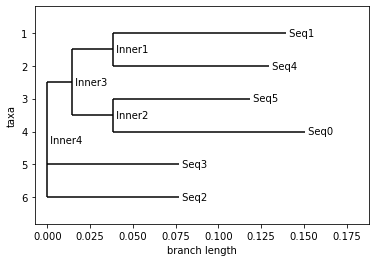

In [52]:
from Bio import Phylo
import pylab
#draw the tree
Phylo.draw(tree)

Al dibujar un árbol filogenético, necesitaremos un módulo "pylab". Esto viene con Anaconda por defecto, o se puede instalar usando los instaladores "pip" o "conda". El resultado anterior es fácil de interpretar para ancestros comunes, puntos de especiación, etc

## Manejo de archivos PDB

The Protein Data Bank (PDB) es una depósito de estructuras de proteínas en 3D.

El plegamiento 3D de las cadena de aminoácidos determina su función. Las estructuras 3D se pueden determinar experimentalmente mediante cristalografía de rayos X, RMN y microscopía electronica. Pero la cristalografía de rayos X es la más utilizada. 

La identificación experimental de la estructura 3D es esencialmente una deducción de las coordenadas de cada átomo en un especio tridimensional.

Estas coordenas, junto con algunas anotaciones, se almacenan en un formato de archivos particular llamado .pdb

Existen softwares para visualizar: RasMol, PyMOL, JMOL, Chimera, etc.

Biopython tiene un módulo para el manejo de estos archivos Bio.PDB

Primero descargaremos un archivo en formato pdb y mmCif, que utliza diccionarios de datos para defnir el contenido de información de las entradas de PDB.

In [53]:
from Bio.PDB import PDBList
pdbl = PDBList()
pdbl.retrieve_pdb_file('1mbs', pdir = '.', file_format = 'pdb')
pdbl.retrieve_pdb_file('1mbs', pdir = '.', file_format = 'mmCif')

Structure exists: './pdb1mbs.ent' 
Structure exists: './1mbs.cif' 


'./1mbs.cif'

De esta forma podemos decargar los archivos directamente de PDB.

necesitamos el PDB ID, directorio y formato del archivo.


In [54]:
# PDBParser puede leer archivos PDB y puede guaradr piezas de información en un formato estrucutrado
#como un diccionario
from Bio.PDB.PDBParser import PDBParser
parser = PDBParser(QUIET = True) # ignora cualquier error (como residuos faltantes) en  archivo meintras lo análiza
pdb_id = "1mbs"
pdb_filename = "pdb1mbs.ent"
structure_pdb = parser.get_structure(pdb_id, pdb_filename)
print(structure_pdb.header.keys())
print('-----------------------------')
print(structure_pdb.header["name"])
print(structure_pdb.header["release_date"])
print(structure_pdb.header["resolution"])
print(structure_pdb.header["keywords"])

dict_keys(['name', 'head', 'idcode', 'deposition_date', 'release_date', 'structure_method', 'resolution', 'structure_reference', 'journal_reference', 'author', 'compound', 'source', 'has_missing_residues', 'missing_residues', 'keywords', 'journal'])
-----------------------------
x-ray crystallographic studies of seal myoglobin. the molecule at 2.5 angstroms resolution
1979-05-15
2.5
oxygen transport


Se utiliza el formato PDBx o mmCIF que utiliza diccionarios de datos para definir el contenido de informaicón de las entradas de PDB.

Este formato tiene un par clave-valor flexible para representar información de la estructura macromolecular y puede acomodar cualquier cantidad de átomos, residuos o cadenas.

El modulo PDBParser  puede leer archivos PDB y guardar información en formato de estructurado como un diccionario de Python.

In [55]:
models = list(structure_pdb.get_models()) # Enumera todos los modelos, n este caso solo existe uno
print(models)

[<Model id=0>]


In [56]:
chains = list(models[0].get_chains()) #Además también podemos recuperar las cadenas de un modelo
print(chains)

[<Chain id=A>]


In [57]:
## La cadena A de 1MBS contiene 154 residuos
residues_0 = list(chains[0].get_residues())
print(len(residues_0))

154


In [58]:
#Podemos tomar todos los átomos del primer residuo, así como las coordenadas del primer modelo
print(residues_0[0])
atoms = list(residues_0[0].get_atoms())
print(atoms)
print(atoms[0].get_vector())

<Residue GLY het=  resseq=1 icode= >
[<Atom N>, <Atom CA>, <Atom C>, <Atom O>]
<Vector 15.74, 11.18, -11.73>


El primer residuo de la cadena A es glicina y contiene 4 atomos, las coordenadas del primer átomo son x=15.74, y=11.18 z=-11.73

In [59]:
for model in structure_pdb.get_models():
    for chain in model.get_chains():
        for residue in chain.get_residues():
            for atom in residue.get_atoms():
                print(atom)
                print(atom.get_vector())
            break
        break
    break

<Atom N>
<Vector 15.74, 11.18, -11.73>
<Atom CA>
<Vector 15.23, 10.46, -10.56>
<Atom C>
<Vector 16.28, 9.48, -10.00>
<Atom O>
<Vector 17.15, 8.98, -10.71>


## Análisis de motivos de secuencia

En biología molecular, un motivo de secuencia es una secuencia corta de nucleótidos que se presume que desempeña una función biológica concreta, puesto que está altamente conservada entre especies. Estas secuencias pueden ser codificantes o no codificantes, y suelen estar implicadas en la regulación de procesos biológicos como la transcripción, el procesamiento del ARN mensajero y la traducción a proteína.

Con frecuencia, el mecanismo por el cual los motivos de secuencia regulan funciones biológicas es modulando la unión específica de proteínas y complejos proteicos a ácidos nucleicos, tales como enzimas nucleasas y factores de transcripción.

Los motivos de secuencia encapsulan funciones biológicas esenciales para la vida. Su estudio es especialmente relevante tanto para la clasificación de familias de proteínas y generación de relaciones filogenéticas robustas, como para entender en profundidad los procesos moleculares que permiten la vida en la tierra.

- Motivos de secuencia: consisten en secuencias lineales cortas de elementos adyacentes que han evolucionado principalmente de forma independiente al contexto molecular que los rodea. Son especialmente comunes en ácidos nucleicos; algunos ejemplos de motivos de secuencia son: caja TATA, señal de N-glicosilación y sitios de reconocimiento de splicing.

   <img src="TATA_box.png" width="600" height="350"/>
   
- Motivos estructurales: estructuras tridimensionales formadas esencialmente por elementos no adyacentes que se han conservado junto a su contexto molecular, dado que su funcionalidad depende directamente de su correcto plegamiento espacial. Tanto las proteínas como los ácidos nucleicos forman supra-estructuras tridimensionales. Ejemplos de motivos estructurales son: las hélice alfa, las regiones transmembrana y los bucles omega.

    <img src="Multiple-sequence-alignment-of-the-DNA-binding-domain-of-62-AraC-XylS-family-members-with_W640.jpeg" width="600" height="350"/>

In [60]:
from Bio import motifs

instances = [
Seq("TACAA"),
Seq("TACGC"),
Seq("TACAC"),
Seq("TACCC"),
Seq("AACCC"),
Seq("AATGC"),
Seq("AATGC")]

In [61]:
m = motifs.create(instances)
print(m)
print(len(m))

TACAA
TACGC
TACAC
TACCC
AACCC
AATGC
AATGC

5


Las instancias se guardan en un atributo m.instances, que es esencialmente una lista de python con algunas funcionalidades adicionales.

El objeto Motif tiene un atributo .counts que contiene los recuentos de cada nucleótido en cada posición.

Esto nos permite visualizar la matriz de conteos

In [62]:
print(m.counts)

        0      1      2      3      4
A:   3.00   7.00   0.00   2.00   1.00
C:   0.00   0.00   5.00   2.00   6.00
G:   0.00   0.00   0.00   3.00   0.00
T:   4.00   0.00   2.00   0.00   0.00



El motivo tiene asociada una secuencia consenso, definida como la secuencia de letras a lo largo de las posiciones del motivo para la que se obtiene el mayor valor en las columnas correspondientes de la matriz.

In [63]:
m.consensus

Seq('TACGC')

Así como una secuencia anticonsensu, correspondiente a los valores más pequeños en las columnas.

In [64]:
m.anticonsensus

Seq('CCATG')

Tenga en cuanta que existen cierta ambigüedad en las definicion de estos consensus si en algunas columnas tienen varios nucleotidos con el recuento maximo o minimo.


También puede solicitar una secuencia de consenso degenerada, en la que se utilizan nucleótidos ambiguos para posiciones en las que hay varios nucleótidos con recuentos elevados:

In [65]:
m.degenerate_consensus

Seq('WACVC')

Aquí, W y R siguen los códigos de ambigüedad de nucleótidos de la IUPAC: W es A o T, y V es A, C o G. La secuencia consenso degenerada se construye siguiendo las reglas especificadas por Cavener.

 <img src="nomenclatura-bases.png" width="300" height="100"/>


También podemos obtener el complemento inverso de un motivo:

In [66]:
#También podemos obtener su reversa complemantaria
r = m.reverse_complement()
r.consensus

Seq('GCGTA')

https://weblogo.berkeley.edu

<img src="logo.png" width="600" height="350"/>


## JASPAR

No existen estandares bien establecidos para almacenar motifs, pero JASPER es uno de los más altamente usados.

JASPER: Es una de las bases de datos de motifs más populares. Además de la información de la secuencia del motif, la base de datos JASPER almacena metainformación para cada motif. 
https://jaspar.genereg.net

<img src="jaspar.png" width="600" height="350"/>

In [67]:
from Bio import motifs
with open("Arnt.sites") as handle:
    arnt = motifs.read(handle, "sites")

In [68]:
print(arnt.instances[:3])

[Seq('CACGTG'), Seq('CACGTG'), Seq('CACGTG')]


In [69]:
for instance in arnt.instances:
    print(instance)

CACGTG
CACGTG
CACGTG
CACGTG
CACGTG
CACGTG
CACGTG
CACGTG
CACGTG
CACGTG
CACGTG
CACGTG
CACGTG
CACGTG
CACGTG
AACGTG
AACGTG
AACGTG
AACGTG
CGCGTG


In [70]:
print(arnt.counts)

        0      1      2      3      4      5
A:   4.00  19.00   0.00   0.00   0.00   0.00
C:  16.00   0.00  20.00   0.00   0.00   0.00
G:   0.00   1.00   0.00  20.00   0.00  20.00
T:   0.00   0.00   0.00   0.00  20.00   0.00



In [71]:
pwm = arnt.counts.normalize(pseudocounts=0.5)
print(pwm)

        0      1      2      3      4      5
A:   0.20   0.89   0.02   0.02   0.02   0.02
C:   0.75   0.02   0.93   0.02   0.02   0.02
G:   0.02   0.07   0.02   0.93   0.02   0.93
T:   0.02   0.02   0.02   0.02   0.93   0.02

